In [1]:
import warnings
import pathlib
import h2o
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from h2o.automl import H2OAutoML
from sklearn.compose import ColumnTransformer
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler

warnings.filterwarnings("ignore")


In [ ]:
# Carga de datos
df_survey = pd.read_pickle(filepath_or_buffer="data/df_survey.pkl")
y = "covid19"
ignore = ["covid19", "id_bio_bubble_contag"]
x = list(set(df_survey.columns) - set(ignore))


In [173]:
# Define the numeric and categorical features
numeric_features = [
    "id_bio_age",
    "id_bio_weight",
    "id_bio_height",
    "id_mat_18p_house_members",
    "id_mat_total_house_members",
]
categorical_features = list(set(x) - set(numeric_features))

# scaler = StandardScaler()
# df_survey_imputed_num = pd.DataFrame(
#     scaler.fit_transform(df_survey[x]), columns=x)
# imputer = KNNImputer(n_neighbors=10)
# df_survey_imputed_num = pd.DataFrame(
#     imputer.fit_transform(df_survey[numeric_features]), columns=numeric_features
# )
# df_survey_imputed_num = df_survey_imputed_num[numeric_features]
# df_survey_imputed_num = pd.DataFrame(
#     imputer.fit_transform(df_survey_imputed_num), columns=df_survey_imputed_num.columns
# )

imputer = SimpleImputer(strategy="mean")
df_survey_imputed_num = pd.DataFrame(
    imputer.fit_transform(df_survey[numeric_features]), columns=numeric_features
)
df_survey_imputed_num = df_survey_imputed_num[numeric_features]

# Define the transformers for numeric and categorical features
# numeric_transformer = Pipeline(
#     # steps=[("imputer", SimpleImputer(strategy="median")), ("scaler", StandardScaler())]
#     steps=[("imputer", KNNImputer(n_neighbors=5)), ("scaler", StandardScaler())]
# )

categorical_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="most_frequent")),
    ]
)

# Define the preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        # ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)

# Fit and transform the data
df_survey_imputed_cat = preprocessor.fit_transform(df_survey[x])

df_survey_imputed = pd.DataFrame(
    np.concatenate([df_survey_imputed_num, df_survey_imputed_cat], axis=1),
    columns=numeric_features + categorical_features,
)

df_survey_imputed.head()


,id_bio_age,id_bio_weight,id_bio_height,id_mat_18p_house_members,id_mat_total_house_members,id_bio_gender,id_bio_bubble_contag,id_beh_severity_percep,id_bio_vacc_status,id_beh_risk_others,...,sd_inc_income_level,id_beh_risk_personal,id_beh_physical_act,id_bio_out_bubble_contag,sd_edu_level,sd_cul_religion,id_bio_death_covid,id_bio_disability,sd_inc_income_problems,sd_eth_is_costa_rican
0,52.0,83.0,178.0,3.0,3.0,1.0,1.0,1.0,0.0,0.0,...,2.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,68.0,68.0,171.0,3.0,3.0,1.0,0.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,1.0
2,36.0,90.0,171.0,2.0,3.0,1.0,0.0,1.0,0.0,0.0,...,2.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0
3,78.0,57.0,150.0,2.0,2.0,0.0,0.0,2.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0
4,20.0,78.0,180.0,5.0,5.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


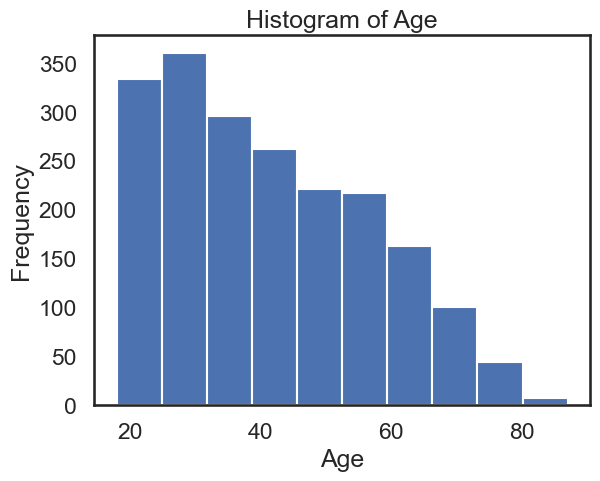

In [174]:
plt.hist(df_survey_imputed.id_bio_age)
plt.title("Histogram of Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()


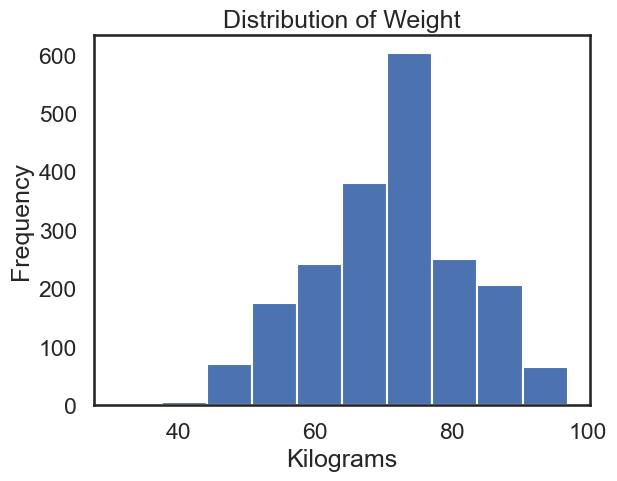

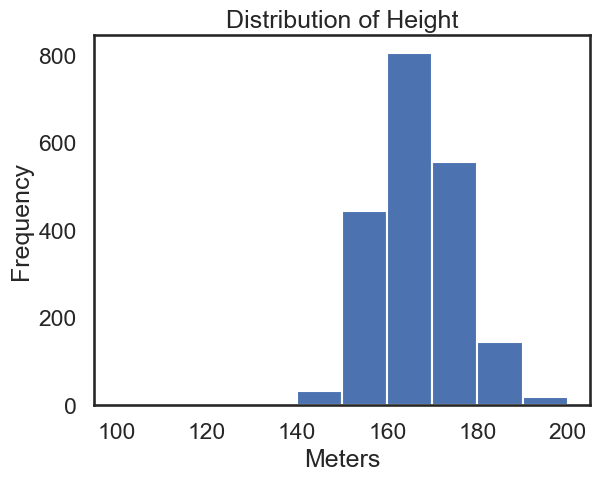

Text(0.5, 1.0, 'Distribution of BMI')

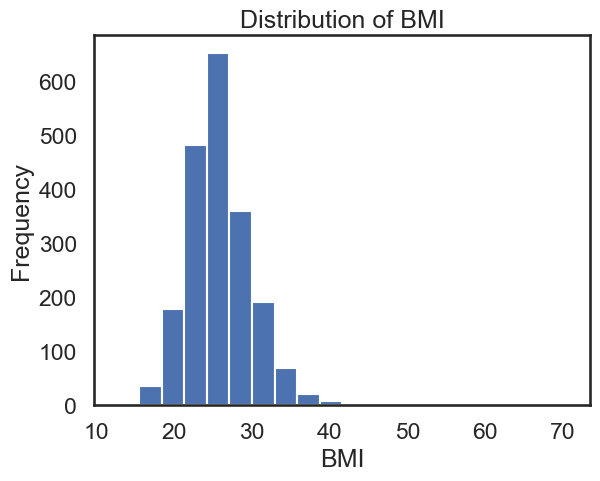

In [175]:
# Plot the distribution of weight
plt.hist(df_survey_imputed.id_bio_weight)
plt.xlabel("Kilograms")
plt.ylabel("Frequency")
plt.title("Distribution of Weight")
plt.show()

# Plot the distribution of height
plt.hist(df_survey_imputed.id_bio_height)
plt.xlabel("Meters")
plt.ylabel("Frequency")
plt.title("Distribution of Height")
plt.show()

# Calculate the BMI and plot its distribution
df_survey_imputed["id_bio_bmi"] = (
    df_survey_imputed["id_bio_weight"] / (df_survey_imputed["id_bio_height"] / 100) ** 2
)
plt.hist(df_survey_imputed.id_bio_bmi, bins=20)
plt.xlabel("BMI")
plt.ylabel("Frequency")
plt.title("Distribution of BMI")


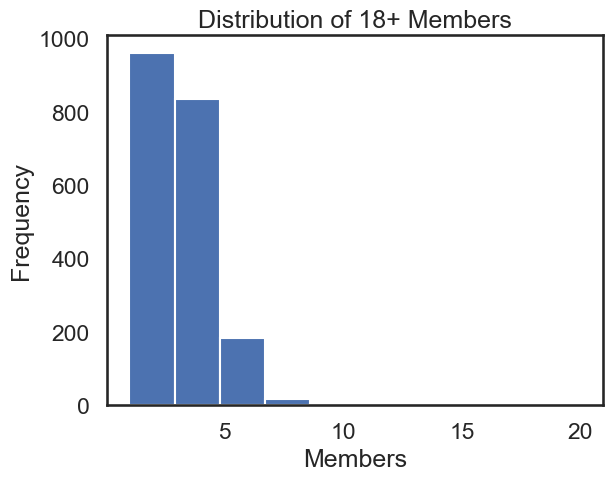

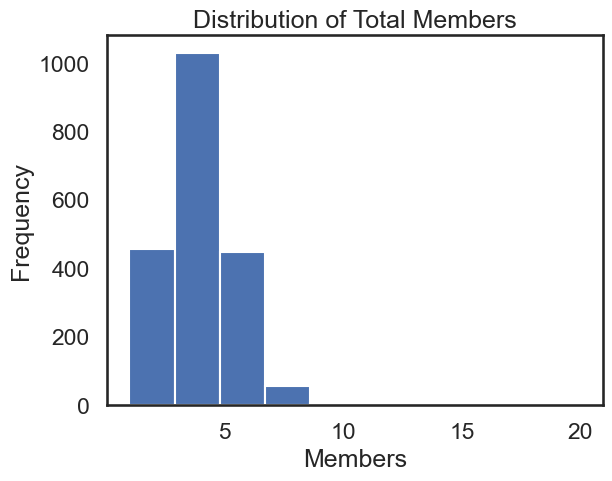

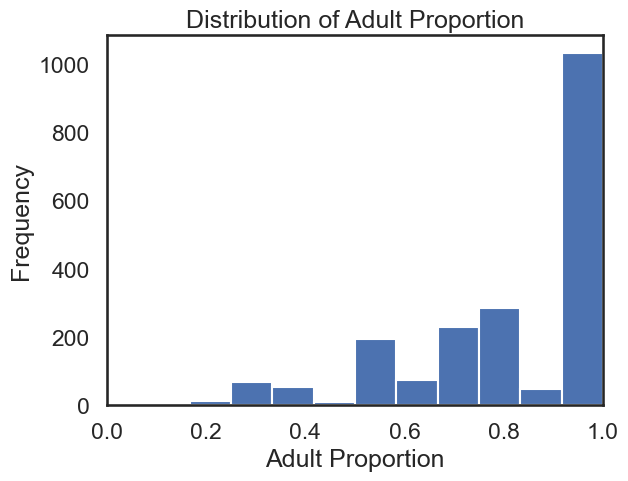

In [176]:
plt.hist(df_survey_imputed.id_mat_18p_house_members)
plt.xlabel("Members")
plt.ylabel("Frequency")
plt.title("Distribution of 18+ Members")
plt.show()

plt.hist(df_survey_imputed.id_mat_total_house_members)
plt.xlabel("Members")
plt.ylabel("Frequency")
plt.title("Distribution of Total Members")
plt.show()

df_survey_imputed["id_mat_adult_prop"] = (
    df_survey_imputed["id_mat_18p_house_members"]
    / df_survey_imputed["id_mat_total_house_members"]
)

df_survey_imputed = df_survey_imputed.assign(
    id_mat_adult_prop=lambda df: np.where(
        df["id_mat_adult_prop"] > 1, 1, df["id_mat_adult_prop"]
    )
)

plt.hist(df_survey_imputed.id_mat_adult_prop, bins=10)
plt.xlabel("Adult Proportion")
plt.ylabel("Frequency")
plt.xlim(0, 1)
plt.title("Distribution of Adult Proportion")
plt.show()


In [177]:
# Clean unused variables

df_survey_imputed = df_survey_imputed.drop(
    columns=[
        "id_bio_weight",
        "id_bio_height",
        "id_mat_18p_house_members",
        "id_mat_total_house_members",
    ]
)
df_survey_imputed.head()


,id_bio_age,id_bio_gender,id_bio_bubble_contag,id_beh_severity_percep,id_bio_vacc_status,id_beh_risk_others,sd_cul_holiday_season,sd_occ_current_job,id_bio_comorbidities,id_psy_anxiety_sympt,...,id_beh_physical_act,id_bio_out_bubble_contag,sd_edu_level,sd_cul_religion,id_bio_death_covid,id_bio_disability,sd_inc_income_problems,sd_eth_is_costa_rican,id_bio_bmi,id_mat_adult_prop
0,52.0,1.0,1.0,1.0,0.0,0.0,2.0,1.0,0.0,0.0,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,26.196187,1.000000
1,68.0,1.0,0.0,2.0,0.0,0.0,2.0,0.0,1.0,0.0,...,0.0,0.0,2.0,1.0,0.0,0.0,0.0,1.0,23.255019,1.000000
2,36.0,1.0,0.0,1.0,0.0,0.0,2.0,1.0,1.0,0.0,...,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,30.778701,0.666667
3,78.0,0.0,0.0,2.0,0.0,0.0,2.0,1.0,0.0,0.0,...,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,25.333333,1.000000
4,20.0,1.0,0.0,0.0,0.0,0.0,2.0,1.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,24.074074,1.000000


In [178]:
X_train, X_test, y_train, y_test = train_test_split(
    df_survey_imputed,
    df_survey[y],
    test_size=0.2,
    random_state=40,
    stratify=df_survey[y],
)


print("#" * 5 + " Split sample " + "#" * 5)
print("train:%d, test:%d" % (len(y_train.index), len(y_test.index)))
print("#" * 5 + " Distribution Train Sample " + "#" * 5)
print(y_train.value_counts() / len(y_train))
print("#" * 5 + " Distribution Test Sample " + "#" * 5)
print(y_test.value_counts() / len(y_test))

train = pd.concat([y_train, X_train], axis=1)
test = pd.concat([y_test, X_test], axis=1)


##### Split sample #####
train:1602, test:401
##### Distribution Train Sample #####
covid19
False    0.730961
True     0.269039
Name: count, dtype: float64
##### Distribution Test Sample #####
covid19
False    0.730673
True     0.269327
Name: count, dtype: float64


In [179]:
df_survey_imputed.columns.sort_values().tolist()


['id_beh_contag_percep',
 'id_beh_physical_act',
 'id_beh_risk_others',
 'id_beh_risk_personal',
 'id_beh_severity_percep',
 'id_bio_age',
 'id_bio_bmi',
 'id_bio_bubble_contag',
 'id_bio_comorbidities',
 'id_bio_death_covid',
 'id_bio_disability',
 'id_bio_gender',
 'id_bio_out_bubble_contag',
 'id_bio_vacc_status',
 'id_mat_adult_prop',
 'id_psy_anxiety_sympt',
 'id_psy_vacc_myths',
 'sd_cul_holiday_season',
 'sd_cul_religion',
 'sd_edu_level',
 'sd_eth_is_costa_rican',
 'sd_inc_income_level',
 'sd_inc_income_problems',
 'sd_occ_current_job']

In [180]:
categorical_features


['id_bio_gender',
 'id_bio_bubble_contag',
 'id_beh_severity_percep',
 'id_bio_vacc_status',
 'id_beh_risk_others',
 'sd_cul_holiday_season',
 'sd_occ_current_job',
 'id_bio_comorbidities',
 'id_psy_anxiety_sympt',
 'id_psy_vacc_myths',
 'id_beh_contag_percep',
 'sd_inc_income_level',
 'id_beh_risk_personal',
 'id_beh_physical_act',
 'id_bio_out_bubble_contag',
 'sd_edu_level',
 'sd_cul_religion',
 'id_bio_death_covid',
 'id_bio_disability',
 'sd_inc_income_problems',
 'sd_eth_is_costa_rican']

In [ ]:
import skimpy

bool_variables = [
    "id_bio_death_covid",
    "id_bio_vacc_status",
    "sd_inc_income_problems",
    "id_bio_gender",
    "sd_occ_current_job",
    "sd_eth_is_costa_rican",
    "id_bio_comorbidities",
    "sd_cul_religion",
    "id_bio_disability",
]
cat012_variables = list(
    set(
        [
            "id_psy_anxiety_sympt",
            "id_bio_disability",
            "id_psy_vacc_myths",
            "sd_eth_is_costa_rican",
            "sd_occ_current_job",
            "id_beh_risk_others",
            "id_beh_physical_act",
            "sd_cul_holiday_season",
            "sd_inc_income_level",
            "id_beh_contag_percep",
            "id_beh_risk_personal",
            "id_bio_out_bubble_contag",
            "sd_cul_religion",
            "id_beh_severity_percep",
            "id_bio_comorbidities",
            "id_bio_vacc_status",
            "id_bio_gender",
            "sd_edu_level",
            "id_bio_death_covid",
            "sd_inc_income_problems",
        ]
    )
    - set(bool_variables)
)
df = df_survey_imputed.copy()
df[bool_variables] = df[bool_variables].astype("bool")
cat_012_ord = pd.CategoricalDtype(categories=[0, 1, 2], ordered=True)
df[cat012_variables] = df[cat012_variables].astype("category")


# select only categorical and boolean columns
cat_cols = df.select_dtypes(include=["category", "bool"]).columns

# create an empty data frame to store the results
result_df = pd.DataFrame(columns=["Count", "Percentage"])

# iterate over each categorical or boolean column
for col in cat_cols:
    # count the number of occurrences of each value in the column
    value_counts = df[col].value_counts()
    # calculate the percentage of each value with respect to the total
    percentages = value_counts / len(df) * 100
    # combine the count and percentage into a single string
    count_percentage = (
        value_counts.astype(str) + " (" + percentages.round(2).astype(str) + "%)"
    )
    # add the count and percentage to the result data frame
    result_df.loc[col] = [value_counts.sum(), count_percentage.to_dict()]

# display the result data frame
print(result_df.to_latex(escape=False))

# # Frequency tables for each categorical feature
# for column in df.select_dtypes(include=["bool", "category"]).columns:
#     display(
#         pd.crosstab(index=df[column],
#                     columns="% observations", normalize="columns").T
#         * 100
#     )
#     display(pd.crosstab(index=df[column], columns="count").T)

# display(df.describe().T)


\begin{tabular}{lrl}
\toprule
 & Count & Percentage \\
\midrule
id_bio_gender & 2003 & {False: '1076 (53.72%)', True: '927 (46.28%)'} \\
id_bio_bubble_contag & 2003 & {False: '1275 (63.65%)', True: '728 (36.35%)'} \\
id_beh_severity_percep & 2003 & {2.0: '762 (38.04%)', 0.0: '627 (31.3%)', 1.0: '614 (30.65%)'} \\
id_bio_vacc_status & 2003 & {False: '1837 (91.71%)', True: '166 (8.29%)'} \\
id_beh_risk_others & 2003 & {0.0: '1650 (82.38%)', 1.0: '267 (13.33%)', 2.0: '86 (4.29%)'} \\
sd_cul_holiday_season & 2003 & {2.0: '1708 (85.27%)', 1.0: '209 (10.43%)', 0.0: '86 (4.29%)'} \\
sd_occ_current_job & 2003 & {True: '1375 (68.65%)', False: '628 (31.35%)'} \\
id_bio_comorbidities & 2003 & {False: '1219 (60.86%)', True: '784 (39.14%)'} \\
id_psy_anxiety_sympt & 2003 & {0.0: '1986 (99.15%)', 1.0: '14 (0.7%)', 2.0: '3 (0.15%)'} \\
id_psy_vacc_myths & 2003 & {0.0: '1869 (93.31%)', 1.0: '77 (3.84%)', 2.0: '57 (2.85%)'} \\
id_beh_contag_percep & 2003 & {2.0: '789 (39.39%)', 1.0: '707 (35.3%)', 0.0:

In [182]:
# create a copy of the original data frame
df = df_survey_imputed.copy()


In [183]:
# Inicializar h2o
# h2o.cluster().shutdown()

h2o.init()


Checking whether there is an H2O instance running at http://localhost:54321. connected.
Please download and install the latest version from: https://h2o-release.s3.amazonaws.com/h2o/latest_stable.html


H2O_cluster_uptime:,17 mins 59 secs
H2O_cluster_timezone:,America/Costa_Rica
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.6
H2O_cluster_version_age:,3 months and 23 days
H2O_cluster_name:,H2O_from_python_maikol_o5yzt6
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.948 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


In [184]:
train.columns


Index(['covid19', 'id_bio_age', 'id_bio_gender', 'id_bio_bubble_contag',
       'id_beh_severity_percep', 'id_bio_vacc_status', 'id_beh_risk_others',
       'sd_cul_holiday_season', 'sd_occ_current_job', 'id_bio_comorbidities',
       'id_psy_anxiety_sympt', 'id_psy_vacc_myths', 'id_beh_contag_percep',
       'sd_inc_income_level', 'id_beh_risk_personal', 'id_beh_physical_act',
       'id_bio_out_bubble_contag', 'sd_edu_level', 'sd_cul_religion',
       'id_bio_death_covid', 'id_bio_disability', 'sd_inc_income_problems',
       'sd_eth_is_costa_rican', 'id_bio_bmi', 'id_mat_adult_prop'],
      dtype='object')

In [ ]:
# Convertir a h2o
col_types = {
    "covid19": "enum",
    "id_beh_contag_percep": "enum",
    "id_beh_severity_percep": "enum",
    "id_bio_out_bubble_contag": "enum",
    "id_bio_death_covid": "enum",
    "id_beh_risk_personal": "enum",
    "id_beh_risk_others": "enum",
    "id_beh_physical_act": "enum",
    "id_psy_vacc_myths": "enum",
    "id_bio_vacc_status": "enum",
    "id_psy_anxiety_sympt": "enum",
    "sd_inc_income_problems": "enum",
    "sd_inc_income_level": "enum",
    "sd_cul_holiday_season": "enum",
    "id_bio_gender": "enum",
    "id_bio_age": "numeric",
    "id_bio_bmi": "numeric",
    #    "id_bio_weight": "numeric",
    #   "id_bio_height": "numeric",
    "sd_edu_level": "enum",
    "sd_occ_current_job": "enum",
    "sd_eth_is_costa_rican": "enum",
    "id_bio_comorbidities": "enum",
    "sd_cul_religion": "enum",
    "id_bio_disability": "enum",
    "id_mat_adult_prop": "numeric",
    # "id_mat_18_plus_household_members": "numeric",
    # "id_mat_total_household_members": "numeric",
}

train_h2o = h2o.H2OFrame(train, column_types=col_types)
test_h2o = h2o.H2OFrame(test, column_types=col_types)


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [186]:
train_h2o.types


{'covid19': 'enum',
 'id_bio_age': 'int',
 'id_bio_gender': 'enum',
 'id_bio_bubble_contag': 'enum',
 'id_beh_severity_percep': 'enum',
 'id_bio_vacc_status': 'enum',
 'id_beh_risk_others': 'enum',
 'sd_cul_holiday_season': 'enum',
 'sd_occ_current_job': 'enum',
 'id_bio_comorbidities': 'enum',
 'id_psy_anxiety_sympt': 'enum',
 'id_psy_vacc_myths': 'enum',
 'id_beh_contag_percep': 'enum',
 'sd_inc_income_level': 'enum',
 'id_beh_risk_personal': 'enum',
 'id_beh_physical_act': 'enum',
 'id_bio_out_bubble_contag': 'enum',
 'sd_edu_level': 'enum',
 'sd_cul_religion': 'enum',
 'id_bio_death_covid': 'enum',
 'id_bio_disability': 'enum',
 'sd_inc_income_problems': 'enum',
 'sd_eth_is_costa_rican': 'enum',
 'id_bio_bmi': 'real',
 'id_mat_adult_prop': 'real'}

In [ ]:
max_models = 1000
model_version = "wo_bubble_2025-02-25-v0-" + str(max_models) + "-models"

filepath = pathlib.Path("models/aml_leader_model_" + model_version)
print(filepath)


models/aml_leader_model_2025-02-25-v0-1000-models


In [188]:
if not filepath.exists():
    excluded_algos = ["StackedEnsemble", "DeepLearning"]
    # Definir modelo y entrenar
    aml = H2OAutoML(
        nfolds=-1,
        max_models=max_models,
        max_runtime_secs=3600,
        seed=42,
        stopping_metric="aucpr",
        sort_metric="aucpr",
        balance_classes=False,
        exclude_algos=excluded_algos,
        keep_cross_validation_predictions=True,
        keep_cross_validation_fold_assignment=True,
        keep_cross_validation_models=True,
    )
    aml.train(y=y, training_frame=train_h2o)
    h2o.save_model(
        aml.leader,
        path="models/",
        force=True,
        filename="aml_leader_model_" + model_version,
        export_cross_validation_predictions=True,
    )
    aml_leader = aml.leader
else:
    aml_leader = h2o.load_model("models/aml_leader_model_" + model_version)

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


In [189]:
filepath_details = pathlib.Path("models/aml_leader_model_details_" + model_version)
if not filepath_details.exists():
    aml_leader.save_model_details(
        path="models/", force=True, filename="aml_leader_model_details_" + model_version
    )

In [190]:
aml_leader


Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_grid_1_AutoML_2_20250225_113500_model_954


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    28                 28                          3697                   3            5            3.39286       5             7             5.89286

ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.14225345110439064
RMSE: 0.3771650183996266
LogLoss: 0.44652514959160183
Mean Per-Class Error: 0.21373248715576154
AUC: 0.8386093944731633
AUCPR: 0.6577082045948085
Gini: 0.6772187889463266

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3612749519687774
       False    True    Error    Rate
-----  -------  ------  -------  --------------
False  953      218     0.1862   (218.0/1171.0)
True   104      327     0.2413   (104.0/431.0)
Total  1057     545     0.201    (322.0/1602.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.361275     0.670082  191
max f2                       0.181296     0.745279  266
max f0point5                 0.395943     0.637556  171
max accuracy                 0.395943     0.805868  171
max precision                0.630683     1         0
max recall                   0.098976     1         391
max specificity              0.630683     1         0
max absolute_mcc             0.361275     0.5359    191
max min_per_class_accuracy   0.230423     0.779582  222
max mean_per_class_accuracy  0.352589     0.787186  196
max tns                      0.630683     1171      0
max fns                      0.630683     430       0
max fps                      0.0807625    1171      399
max tps                      0.098976     431       391
max tnr                      0.630683     1         0
max fnr                      0.630683     0.99768   0
max fpr                      0.0807625    1         399
max tpr                      0.098976     1         391

Gains/Lift Table: Avg response rate: 26.90 %, avg score: 26.83 %
group    cumulative_data_fraction    lower_threshold    lift       cumulative_lift    response_rate    score     cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ---------  -----------------  ---------------  --------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0106117                   0.594319           3.27965    3.27965            0.882353         0.610892  0.882353                    0.610892            0.0348028       0.0348028                  227.965   227.965            0.0330948
2        0.0205993                   0.584576           3.02001    3.15377            0.8125           0.588542  0.848485                    0.600056            0.0301624       0.0649652                  202.001   215.377            0.0606953
3        0.0305868                   0.573841           3.25232    3.18595            0.875            0.580186  0.857143                    0.593568            0.0324826       0.0974478                  225.232   218.595            0.09147
4        0.0405743                   0.563218           3.02001    3.1451             0.8125           0.567353  0.846154                    0.587115            0.0301624       0.12761                    202.001   214.51             0.11907
5        0.0505618                   0.553041           2.7877     3.0745             0.75             0.5580

In [191]:
aml_leader.summary()


,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
,28.0,28.0,3697.0,3.0,5.0,3.392857,5.0,7.0,5.892857


In [192]:
# Performance del modelo

perf = aml_leader.model_performance(test_data=test_h2o)
prevalence = sum(df_survey.covid19) / len(df_survey)
threshold = perf.F1()[0][0]
sensitivity = perf.recall(thresholds=[threshold])[0][1]
specificity = perf.specificity(thresholds=[threshold])[0][1]
F1 = perf.F1(thresholds=[threshold])[0][1]
F2 = perf.F2(thresholds=[threshold])[0][1]
AUC = perf.auc()
AUC_PR = perf.aucpr()
precision = perf.precision(thresholds=[threshold])[0][1]
accuracy = perf.accuracy(thresholds=[threshold])[0][1]


print("Prevalence", prevalence)
print("Threshold", threshold)
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)
print("Precision:", precision)
print("Accuracy:", accuracy)
print("F1:", F1)
print("F2:", F2)
print("AUC:", AUC)
print("AUC_PR:", AUC_PR)
print(perf.confusion_matrix(thresholds=[threshold]))


Prevalence 0.2690963554667998
Threshold 0.37911216824984634
Sensitivity: 0.7870370370370371
Specificity: 0.7781569965870307
Precision: 0.5666666666666667
Accuracy: 0.7805486284289277
F1: 0.6589147286821706
F2: 0.7302405498281787
AUC: 0.8148148148148148
AUC_PR: 0.5897514622371667
Confusion Matrix (Act/Pred) @ threshold = 0.37911216824984634
       False    True    Error    Rate
-----  -------  ------  -------  ------------
False  228      65      0.2218   (65.0/293.0)
True   23       85      0.213    (23.0/108.0)
Total  251      150     0.2195   (88.0/401.0)


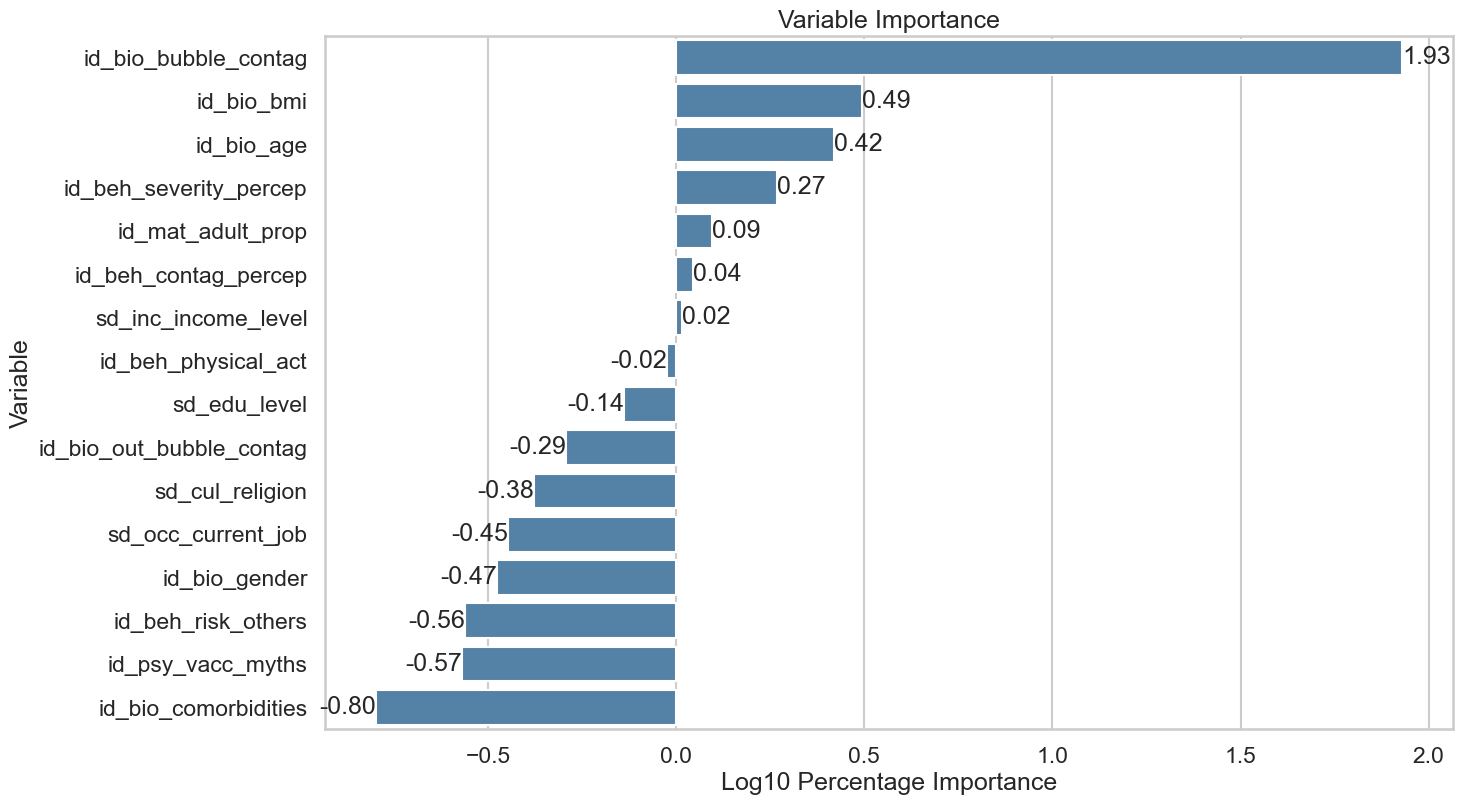

In [193]:
# Get variable importance data
var_imp = aml_leader.varimp(use_pandas=True)

# Filter only the variables with positive scaled_importance value
var_imp = var_imp[var_imp["percentage"] > 0]
var_imp["log_scaled_importance"] = np.log10(var_imp["percentage"] * 100)

h = 9
w = h * 1.618
# Create plot using seaborn
sns.set(style="whitegrid")
sns.set_context("talk")
plt.figure(figsize=(w, h))  # set the figure size
ax = sns.barplot(
    x="log_scaled_importance", y="variable", data=var_imp, color="steelblue"
)
ax.bar_label(ax.containers[0], fmt="%.2f")

# Set informative labels for the plot
plt.title("Variable Importance")
plt.xlabel("Log10 Percentage Importance")
plt.ylabel("Variable")

# Set the x-axis limits to adjust the scale
# plt.xlim(0, 1)

# Save plot to pdf file
plt.savefig("img/plot_var_imp_" + model_version + ".pdf", bbox_inches="tight")
plt.show()


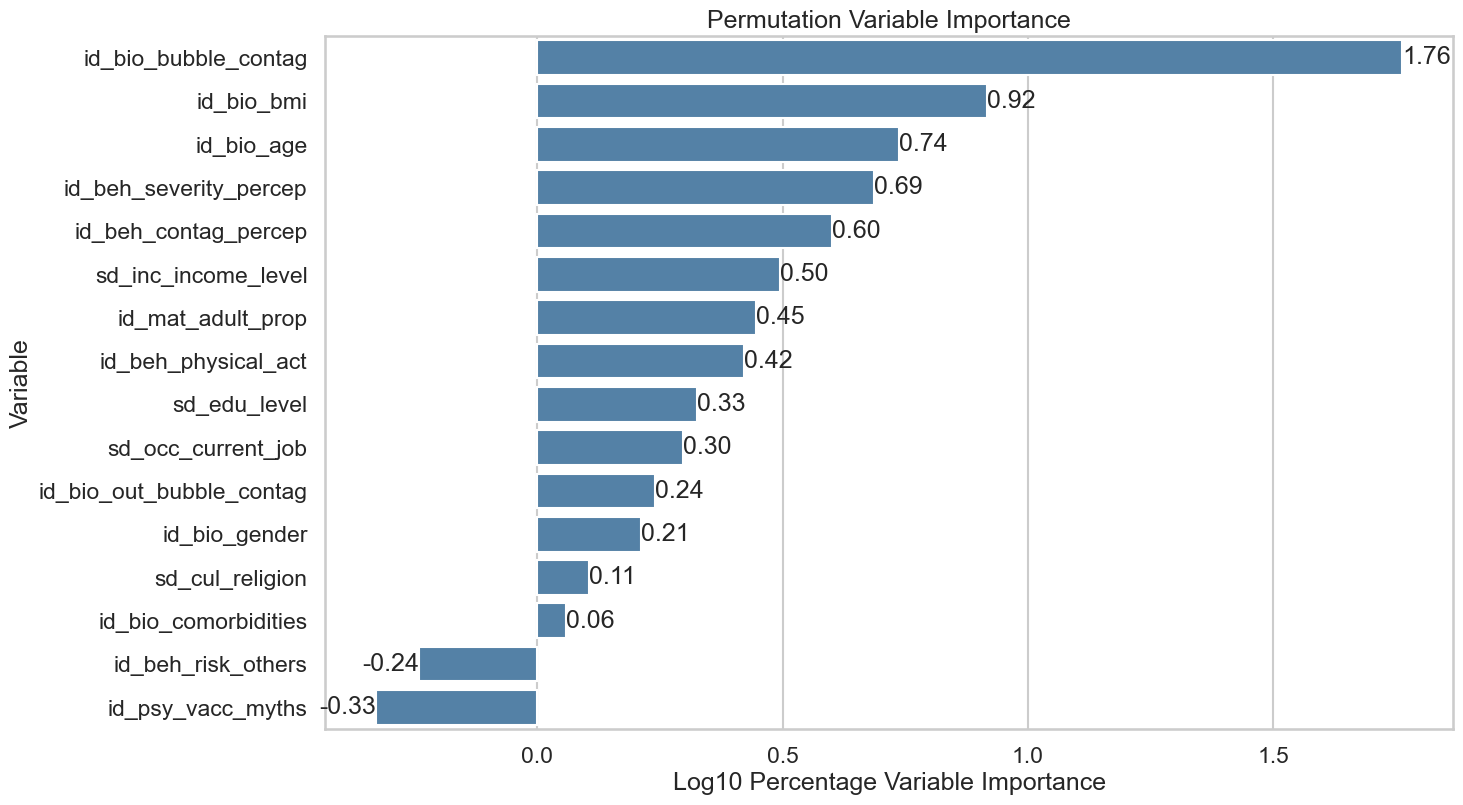

In [194]:
perm_imp = aml_leader.permutation_importance(
    frame=test_h2o, n_repeats=500, metric="PR_AUC", seed=42
)
perm_imp = perm_imp.as_data_frame()
perm_imp["mean"] = perm_imp[perm_imp.columns[1:]].mean(axis=1)
perm_imp = perm_imp.sort_values(by="mean", ascending=False)
perm_imp["Scaled Importance"] = perm_imp["mean"] / perm_imp["mean"].sum()

# perm_imp = perm_imp.as_data_frame()
perm_imp = perm_imp[perm_imp["Scaled Importance"] > 0]
perm_imp["log_scaled_importance"] = np.log10(perm_imp["Scaled Importance"] * 100)

h = 9
w = h * 1.618
# Create plot using seaborn
sns.set(style="whitegrid")
sns.set_context("talk")
plt.figure(figsize=(w, h))  # set the figure size
ax = sns.barplot(
    x="log_scaled_importance", y="Variable", data=perm_imp, color="steelblue"
)
ax.bar_label(ax.containers[0], fmt="%.2f")

# Set informative labels for the plot
plt.title("Permutation Variable Importance")
plt.xlabel("Log10 Percentage Variable Importance")
plt.ylabel("Variable")

# Set the x-axis limits to adjust the scale
# plt.xlim(0, 1)

# Save plot to pdf file
plt.savefig("img/plot_perm_imp_" + model_version + ".pdf", bbox_inches="tight")
plt.show()


<Figure size 1456.2x900 with 0 Axes>

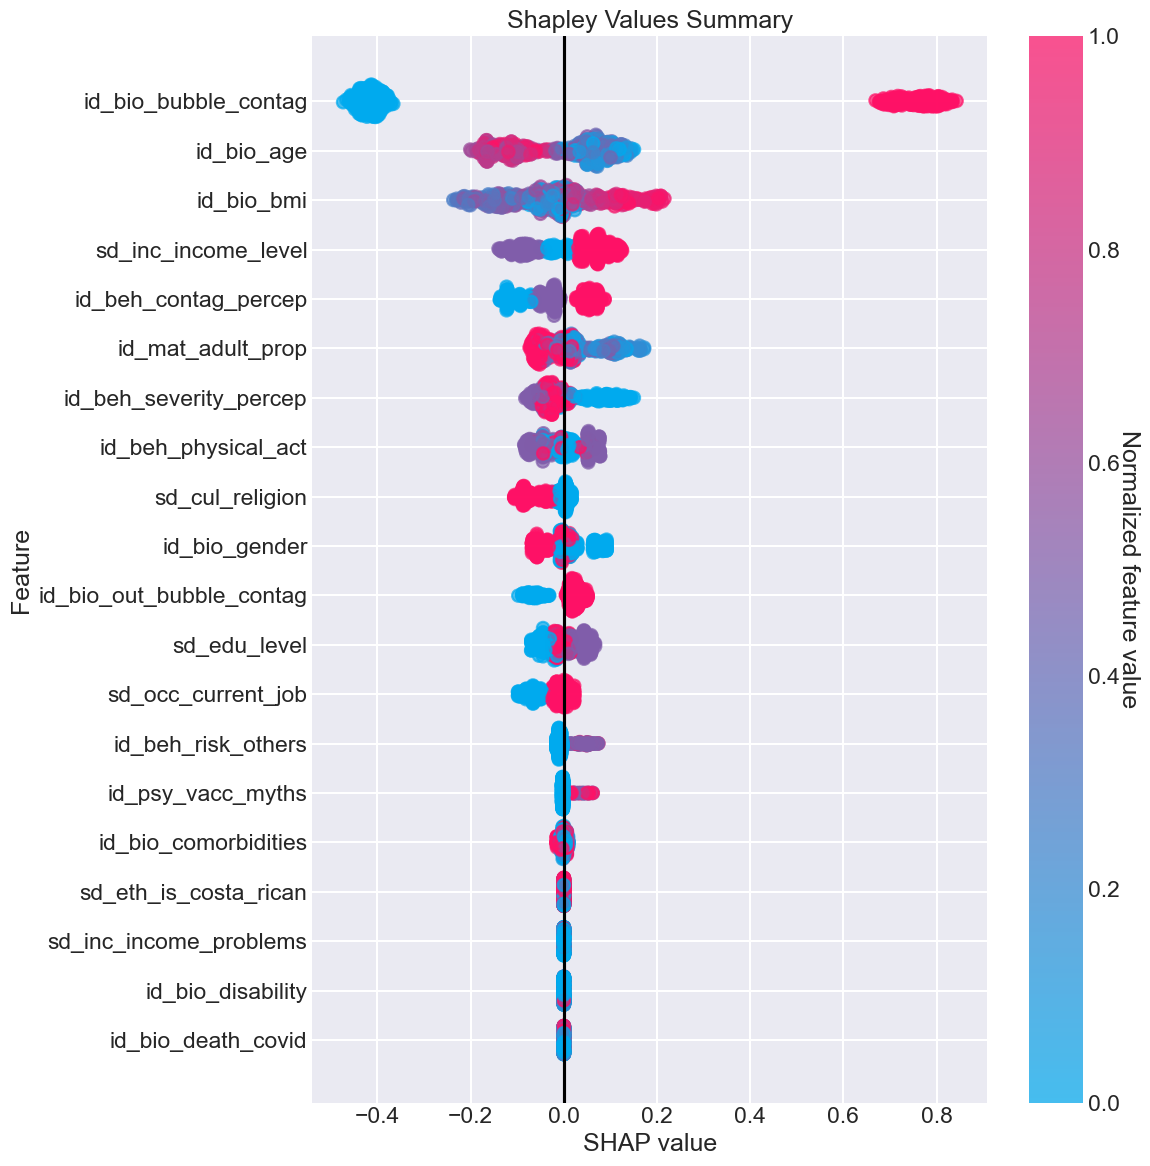

In [195]:
h = 9
w = h * 1.618

plt.style.use("seaborn-v0_8-dark")
plt.figure(figsize=(w, h))  # set the figure size


shap_plot = aml_leader.shap_summary_plot(test_h2o, alpha=0.7)
plt.rcParams.update({"font.size": 30})

plt.title("Shapley Values Summary")
plt.savefig("img/plot_shap_" + model_version + ".pdf", bbox_inches="tight")


In [196]:
xx = aml_leader.cross_validation_models()

# Create a new data frame with the maximum and minumum values of the first and second column of the rocs() output

df_roc = pd.DataFrame(columns=["fpr", "tpr", "model"])
for i in range(len(xx)):
    pp = xx[i].model_performance(test_data=test_h2o)
    # pp.thresholds_and_metric_scores()
    rr = pp.roc()
    df_roc = pd.concat([df_roc, pd.DataFrame({"fpr": rr[0], "tpr": rr[1], "model": i})])

perf = aml_leader.model_performance(test_data=test_h2o)

df_roc = pd.concat(
    [df_roc, pd.DataFrame({"fpr": perf.fprs, "tpr": perf.tprs, "model": 11})]
)

df_roc["index"] = df_roc.index.to_list()

# Group by the index and calculate the max and min values of the fpr and tpr columns and replace the original data frame with the new one
# df_roc_sd = df_roc.groupby("index").std()
df_roc_max = df_roc.groupby("index").max()
df_roc_min = df_roc.groupby("index").min()
df_roc = df_roc_max.merge(df_roc_min, on="index", suffixes=("_max", "_min"))


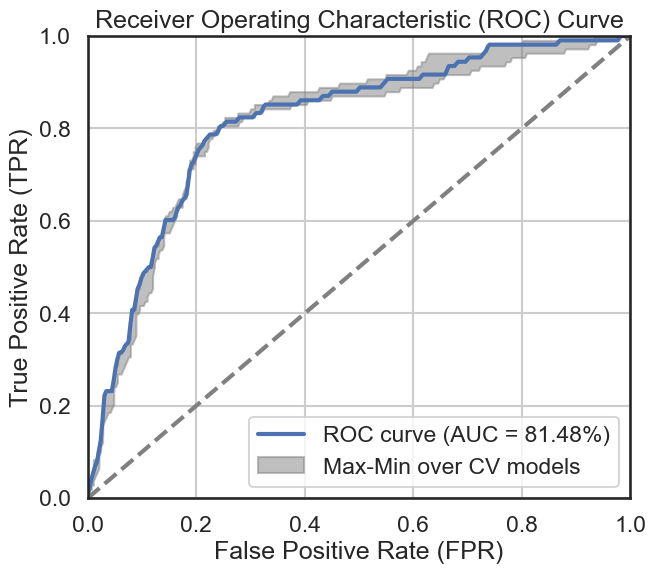

In [197]:
import seaborn as sns
from sklearn.metrics import roc_curve, auc

matplotlib.style.use("default")

fprs = perf.fprs
tprs = perf.tprs
auc = perf.auc()

df = pd.DataFrame({"fpr": fprs, "tpr": tprs})
# increase font size

sns.set_theme(style="white")
sns.set_context("talk")
plt.figure(figsize=(7, 6))
sns.lineplot(
    x="fpr",
    y="tpr",
    lw=3,
    data=df,
    err_style=None,
    label="ROC curve (AUC = {:.2%})".format(auc),
)
plt.fill_between(
    df["fpr"],
    df_roc["tpr_max"],
    df_roc["tpr_min"],
    color="gray",
    alpha=0.5,
    label="Max-Min over CV models",
)
plt.plot([0, 1], [0, 1], color="gray", lw=3, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.savefig("img/plot_roc_" + model_version + ".pdf", bbox_inches="tight")

plt.show()


In [198]:
precision = perf.precision(thresholds="all")
recall = perf.recall(thresholds="all")
pr_auc = perf.pr_auc()

precision = [t[1] for t in precision]
recall = [t[1] for t in recall]


In [199]:
df_pr = pd.DataFrame({"precision": precision, "recall": recall})

for i in range(len(xx)):
    pp = xx[i].model_performance(test_data=test_h2o)
    metrics = pp.thresholds_and_metric_scores()
    df_pr = pd.concat(
        [
            df_pr,
            pd.DataFrame(
                {"precision": metrics["precision"], "recall": metrics["recall"]}
            ),
        ]
    )

perf = aml_leader.model_performance(test_data=test_h2o)
metrics = perf.thresholds_and_metric_scores()
df_pr = pd.concat(
    [
        df_pr,
        pd.DataFrame({"precision": metrics["precision"], "recall": metrics["recall"]}),
    ]
)

df_pr["index"] = df_pr.index.to_list()

df_pr_max = df_pr.groupby("index").max()
df_pr_min = df_pr.groupby("index").min()
df_pr = df_pr_max.merge(df_pr_min, on="index", suffixes=("_max", "_min"))

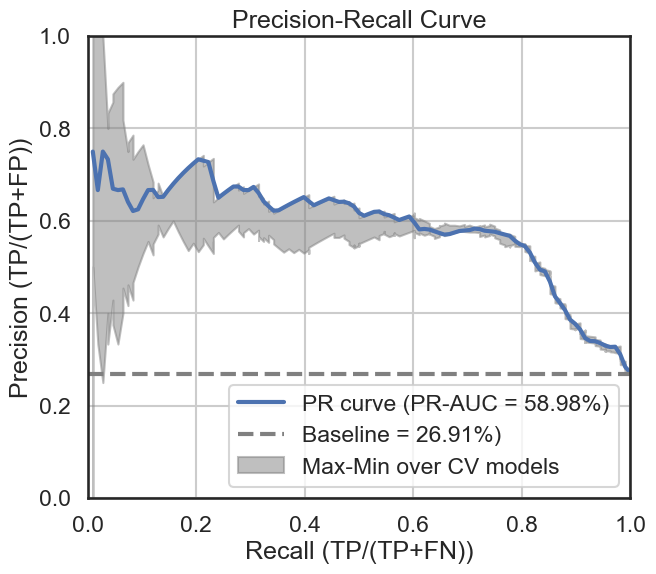

In [200]:
import seaborn as sns
import pandas as pd

precision = perf.thresholds_and_metric_scores()["precision"]
recall = perf.thresholds_and_metric_scores()["recall"]
pr_auc = perf.pr_auc()

# precision = [t[1] for t in precision]
# recall = [t[1] for t in recall]

df = pd.DataFrame({"Recall": recall, "Precision": precision})

# df = df.query("Recall >0 & Recall < 1 & Precision >0 & Precision < 1")

sns.set_theme(style="white")
sns.set_context("talk")
plt.figure(figsize=(7, 6))
sns.lineplot(
    x="Recall",
    y="Precision",
    lw=3,
    data=df,
    err_style=None,
    label="PR curve (PR-AUC = {:.2%})".format(pr_auc),
)
plt.plot(
    [0, 1],
    [prevalence, prevalence],
    color="gray",
    lw=3,
    linestyle="--",
    label="Baseline = {:.2%})".format(prevalence),
)
plt.fill_between(
    df["Recall"],
    df_pr["precision_min"],
    df_pr["precision_max"],
    color="gray",
    alpha=0.5,
    label="Max-Min over CV models",
)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel("Recall (TP/(TP+FN))")
plt.ylabel("Precision (TP/(TP+FP))")
plt.title("Precision-Recall Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.savefig("img/plot_pr_" + model_version + ".pdf", bbox_inches="tight")
plt.show()


In [201]:
# Variable importance
aml_leader.varimp(use_pandas=True)


,variable,relative_importance,scaled_importance,percentage
0,id_bio_bubble_contag,385.910431,1.000000,0.850126
1,id_bio_bmi,14.166566,0.036709,0.031208
2,id_bio_age,11.930317,0.030915,0.026281
3,id_beh_severity_percep,8.417170,0.021811,0.018542
4,id_mat_adult_prop,5.642368,0.014621,0.012430
5,id_beh_contag_percep,5.026086,0.013024,0.011072
6,sd_inc_income_level,4.713545,0.012214,0.010384
7,id_beh_physical_act,4.286057,0.011106,0.009442
8,sd_edu_level,3.300085,0.008551,0.007270
9,id_bio_out_bubble_contag,2.309112,0.005984,0.005087


In [202]:
# Permutation importance
aml_leader.permutation_importance(
    frame=test_h2o, n_repeats=5, metric="PR_AUC", use_pandas=True
)


,Run 1,Run 2,Run 3,Run 4,Run 5
Variable,,,,,
id_bio_bubble_contag,0.268571,0.253354,0.262901,0.280195,0.227461
sd_inc_income_level,0.057842,0.002681,0.008737,0.016845,0.004262
id_bio_age,0.053071,0.035666,0.013170,0.032978,0.020359
id_beh_severity_percep,0.046870,0.011483,0.034204,0.009594,0.014368
id_beh_physical_act,0.021949,0.007266,0.002932,0.012980,0.018756
id_bio_bmi,0.019774,0.019692,0.013665,0.029066,0.037769
sd_occ_current_job,0.015911,0.002011,0.008658,0.009954,0.000403
sd_edu_level,0.008872,0.005360,0.015663,0.003740,0.001889
id_bio_comorbidities,0.008284,0.006722,0.008638,0.007440,0.001259


Cálculo sin burbuja

In [203]:
# Guardar parametros
model_parameters = pd.DataFrame(
    {
        "prevalence": [prevalence],
        "threshold": [threshold],
        "sens_model": sensitivity,
        "spec_model": specificity,
        "people": test_h2o.nrow,
    }
)
print(model_parameters)
model_parameters.to_pickle(path="data/model_parameters_" + model_version + ".pkl")


   prevalence  threshold  sens_model  spec_model  people
0    0.269096   0.379112    0.787037    0.778157     401
